# 와인 분류 실습 (EDA ~ 하이퍼파라미터 튜닝)

## 라이브러리 불러오기

In [28]:
# 데이터 처리 라이브러리
import pandas as pd
import numpy as np
# 시각화 라이브러리
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 전처리 라이브러리
from sklearn.preprocessing import MinMaxScaler #수치형 전처리
from sklearn.preprocessing import OneHotEncoder #문자열 값 전처리
# 모델링 라이브러리
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 분류기
# 교차검증 라이브러리
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score 

# 설정 세팅
# 인라인으로 보기 설정
%matplotlib inline
# 글꼴 설정
plt.rc('font', family='AppleGothic')
# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)
# 분석에 문제가 없는 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')




## EDA

In [29]:
# read_csv() 매서드로 train.csv, test.csv 파일을 df class 로 불러오기
train = pd.read_csv('~/downloads/와인/train.csv')
test = pd.read_csv('~/downloads/와인/test.csv')

In [30]:
# 데이터 정보확인하기
print(train.info()) #14개 행
print(test.info()) #13개 행 (레이블 제외했으니까 !)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB
None
<class 

In [31]:
# 행렬 개수 파악
print('학습용 데이터 :', train.shape) #모델을 훈련시키는 용도
print('예측용 데이터 :', test.shape) #모델의 최종 성능을 평가하는 용도

학습용 데이터 : (5497, 14)
예측용 데이터 : (1000, 13)


In [32]:
# 상위 5개 행 확인하기
print(train.head())
print(test.head())

   index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   density    pH  sulphates  alcohol   type  
0  0.99432  3.44       0.44     10.2  white  
1  0.99690  3.19       0.59      9.5    red  
2  0.991

In [33]:
# 결측치 여부 확인
print(train.isnull().sum())
print(test.isnull().sum())

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64
index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64


In [34]:
# 학습용 데이터 복사본 생성
traindata = train.copy()

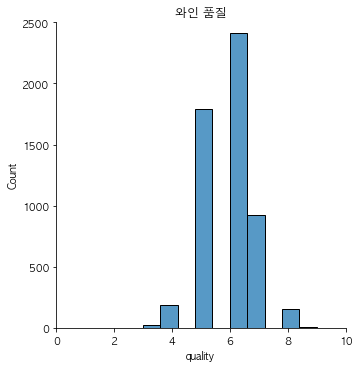

In [35]:
# 타깃 변수(와인 품질) 분포 시각화
#1 seaborn 의 displot() 으로 어느 변수를 시각화할지 옵션에 지정해주세요.
sns.displot(traindata['quality'], kde=False, bins=10)
#2 matplot 의 axis() 로 각 축의 최소, 최대 값을 지정해주세요.
plt.axis([0,10,0,2500])
#3 matplot 의 title() 로 그래프의 제목을 지정해주세요.
plt.title("와인 품질")
#4 matplot 의 show() 로 그래프를 출력해주세요.
plt.show()

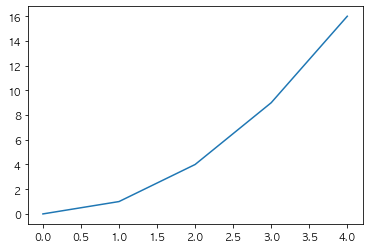

In [36]:
# x축 지점의 값들로 정할 리스트를 생성합니다.
x_values = [0,1,2,3,4]
# y축 지점의 값들로 정할 리스트를 생성합니다.
y_values = [0,1,4,9,16]
# plot() 매서드를 활용해 그래프를 그린 후 화면에 보여줍니다.
plt.plot(x_values, y_values)
plt.show()

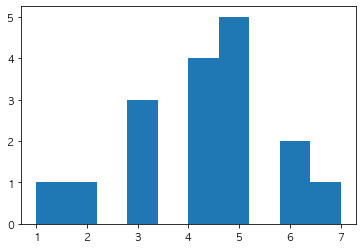

In [37]:
# 변수 분포를 갖는 리스트를 생성합니다.
a = [1,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,7]
# plot() 매서드를 활용해 그래프를 그린 후 화면에 보여줍니다.
plt.hist(a)
plt.show()

## 전처리

<AxesSubplot:>

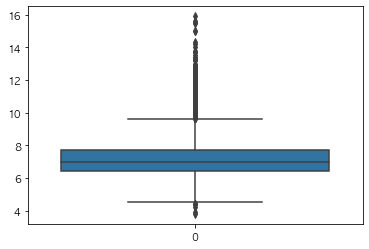

In [38]:
# boxplot() 매서드로 'fixed acidity' 피쳐의 이상치를 확인하는 코드를 아래에 작성하세요.
sns.boxplot(data=train['fixed acidity'])

In [39]:
# "fixed acidity"가 25%인 값을 "quantile_25" 라는 변수에 만들어 주세요
quantile_25 = np.quantile(train['fixed acidity'], 0.25)

# "fixed acidity"가 75%인 값을 "quantile_75" 라는 변수에 만들어 주세요
quantile_75 = np.quantile(train['fixed acidity'],0.75)

# quantile_75와 quantile_25의 차이를 "IQR"이라는 변수에 만들어 주세요
IQR = quantile_75 - quantile_25

# quantile_25보다 1.5 * IQR 작은 값을 "minimum"이라는 변수에 만들어 주세요
minimum = quantile_25 - 1.5 * IQR

# quantile_75보다 1.5 * IQR 큰 값을 "maximum"이라는 변수에 만들어 주세요
maximum = quantile_75 + 1.5 * IQR

# "fixed acidity"가 minimum보다 크고, maximum보다 작은 값들만 "train2"에 저장해 주세요
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]

# train2.shape를 통해서, 총 몇개의 행이 되었는지 확인해보세요.
print("IQR범위로 생성된 데이터 :", train2.shape)

# 이상치 개수 변화 확인
print("이상치 개수 : ", train.shape[0] - train2.shape[0])

IQR범위로 생성된 데이터 : (5203, 14)
이상치 개수 :  294


In [40]:
# describe를 통해 "fixed acidity"의 데이터의 분포가 어떻게 생겼는지 짐작해보세요
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

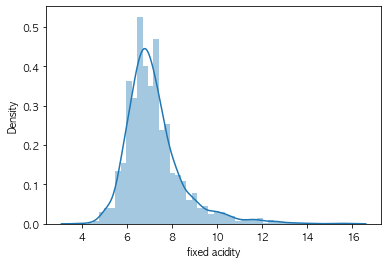

In [41]:
# seaborn의 displot을 통해 "fixed acidity"의 distplot을 그려보세요.
sns.distplot(train['fixed acidity'])

<AxesSubplot:xlabel='Scaled fixed acidity', ylabel='Density'>

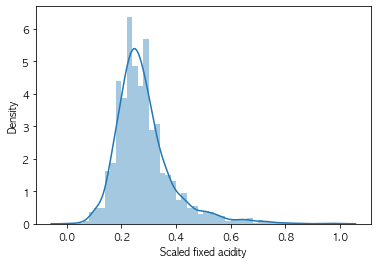

In [42]:
# MinMaxScaler를 "scaler"라는 변수에 지정해주세요.
scaler = MinMaxScaler()

# "scaler"를 학습시켜주세요.
scaler.fit(train[['fixed acidity']])

# "scaler"를 통해 train과 test의 "fixed acidity"를 바꾸어 "Scaled fixed acidity"라는 column에 저장해주세요.
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

# seaborn의 displot을 통해 "Scaled fixed acidity"의 distplot을 그려보세요
sns.distplot(train['Scaled fixed acidity'])

In [43]:
# "OneHotEncoder"를 "encoder"라는 변수에 저장해보세요.
encoder = OneHotEncoder()

# "encoder"를 사용해 train의 "type" 피쳐를 학습시켜보세요.
encoder.fit(train[['type']])

# "encoder"를 사용해 train의 "type"피쳐를 변환해 "onehot"이라는 변수에, test의 "type"피쳐를 변환해 "onehot2"라는 변수에 저장해보세요.
onehot = encoder.transform(train[['type']])
onehot2 = encoder.transform(test[['type']])
print(onehot)

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 0)	1.0
  (15, 1)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 0)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (5472, 0)	1.0
  (5473, 1)	1.0
  (5474, 1)	1.0
  (5475, 1)	1.0
  (5476, 1)	1.0
  (5477, 1)	1.0
  (5478, 1)	1.0
  (5479, 0)	1.0
  (5480, 1)	1.0
  (5481, 0)	1.0
  (5482, 1)	1.0
  (5483, 0)	1.0
  (5484, 1)	1.0
  (5485, 1)	1.0
  (5486, 1)	1.0
  (5487, 0)	1.0
  (5488, 1)	1.0
  (5489, 1)	1.0
  (5490, 0)	1.0
  (5491, 1)	1.0
  (5492, 1)	1.0
  (5493, 1)	1.0
  (5494, 1)	1.0
  (5495, 1)	1.0
  (5496, 1)	1.0


In [44]:
# "onehot", "onehot2" 라는 변수를 array 형태로 변환해 보세요.
onehot = onehot.toarray()
onehot2 = onehot2.toarray()
print(onehot)

# "onehot","onethot2"라는 변수를 DataFrame 형태로 변환해 보세요
onehot = pd.DataFrame(onehot)
onehot2 = pd.DataFrame(onehot2)
print(onehot.head())

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
     0    1
0  0.0  1.0
1  1.0  0.0
2  0.0  1.0
3  0.0  1.0
4  0.0  1.0


In [45]:
# onehot, onehot2를 원본데이터인 train,test에 병합시켜보세요.
onehot = pd.concat([train, onehot], axis = 1)
onehot.head()

# train과 test의 "type" 변수를 제거해주세요.
train = train.drop(columns = ['type'])
test = test.drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579


In [46]:
# 단순화된 코드 🤗 (데이터 불러오기 ~ 인코딩)

train = pd.read_csv('~/downloads/와인/train.csv') #학습용 데이터 불러오기
test = pd.read_csv('~/downloads/와인/test.csv') #예측용 데이터 불러오기

encorder = OneHotEncoder() #원핫인코더 선언
onehot = pd.DataFrame(encoder.fit_transform(train[['type']]).toarray(), columns = encoder.get_feature_names()) #fit_trasform() : 훈련(fit) + 변환(transform)
onehot2 = pd.DataFrame(encoder.fit_transform(test[['type']]).toarray(), columns= encoder.get_feature_names()) # get_feature_names() : 컬럼(피쳐) 이름 리스트

train = pd.concat([train, onehot], axis = 1).drop(columns= ['type']) # pd.concat([데이터프레임리스트]) : 데이터프레임을 이어붙임, axis=0(default) : 행을 이어붙임, axis=1 : 열을 이어붙임
test = pd.concat([test, onehot2], axis = 1).drop(columns= ['type'])
print(train.head())
# print(test.head())

   index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   density    pH  sulphates  alcohol  x0_red  x0_white  
0  0.99432  3.44       0.44     10.2     0.0       1.0  
1  0.99690  3.19       0.59     

## 모델링

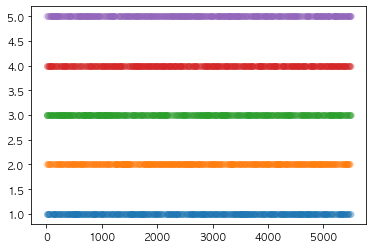

In [51]:
# 랜덤포레스트 분류 모형 불러오기
from sklearn.ensemble import RandomForestClassifier

# 분류모형 "random_forest" 변수에 저장하기
random_forest = RandomForestClassifier()

# "X"라는 변수에 train의 "quality" 피쳐 제거하고 저장하기
X = train.drop(columns=['quality'])

# "y"라는 변수에 훈련용 데이터의 "quality" 피쳐 저장하기
y = train['quality']

# 랜덤포레스트 분류기 모델을 x, y를 이용해 학습시키기
random_forest.fit(X,y)

# sklearn의 교차검증(KFold) 모델 불러오기
from sklearn.model_selection import KFold

# KFold에 n_splits = 5, shuffle = True, random_state = 0이라는 인자를 추가해 "kf"라는 변수에 저장
kf = KFold(n_splits=5, shuffle=True, random_state=0) # n_splits = 몇번 나눌 것인지, shuffle= 섞을건지 여부, random_state = 특정 상수로 값을 고정

# 반복문을 통해서 1~5번까지의 데이터에 접근해보기
# 데이터프레임 접근 방식(loc, iloc)
    # 데이터프레임.iloc[행 인덱싱, 열 인덱싱] : 해당 행렬 인덱스가 일치하는 값만 추출
    # 데이터프레임.loc[행 이름, 열 이름] : 해당 행렬 이름에 일치하는 값만 추출
for train_idx, valid_idx in kf.split(train) :
    train_data = train.iloc[train_idx]
    valid_data = train.iloc[valid_idx] 

#데이터를 스캐터 플롯으로 확인하기
import matplotlib.pyplot as plt


kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
train_idx_store = []
valid_idx_store = []

i = 1
for train_idx, valid_idx in kf.split(train) :
  plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
  i += 1
plt.show()


In [ ]:
# "X"라는 변수에 train의 "index"와 "quality"를 제외하고 지정해 주세요
# "y"라는 변수에는 "quality"를 지정해 주세요